# **Shinkansen Travel Experience**




#**Problem Definition**

**Goal:** To predict if a passenger is satisfied based on his/her overall experience traveling on the Shinkansen Bullet train.

**Objectives:**
* Build ML models designed to predict the satisfaction of passengers traveling on the Shinkansen Bullet Train.
* Identify factors that affect passenger satisfaction. <br> <br>

**The key questions:**
*  What are the factors that determine a passenger's satisfaction, and their relative importance?
* Which factors of satisfaction can be affected by management?
* What changes can be implemented to improve customer satisfaction?
  <br> <br>


#**About the dataset**

The data set consists of csv files, in 2 folders, Train_Data, Test_Data. <br> Each folder contains two csv files, one for the Traveldata, and one for the Surveydata.
<br>

**Features of Traveldata:**<br>
* ID: unique passenger ID
* Gender: 'Male', 'Female'
* Customer_Type: 'Loyal Customer', 'Disloyal Customer'
* Age: age of the passenger
* Type_Travel: 'Personal Travel', 'Business Travel'
* Travel_Class: 'Business', 'Eco'
* Travel_Distance: distance traveled
* Departure_Delay_in_Mins: delay in minutes
* Arrival_Delay_in_Mins: delay in minutes

<br>

**Target Variable, Surveydata:** The target variable is Overall_Experience, where 0 is 'not satisfied' and 1 is 'satisfied'. <br>


##**Data Preparation**

In [ ]:
# mount the drive
from google.colab import drive # mount to Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries
import numpy as np # data processing
import pandas as pd # tabular data analysis
import matplotlib.pyplot as plt # stat plots
import seaborn as sns # plotting

from sklearn.model_selection import train_test_split # partition the data into train set and test set
from sklearn.preprocessing import MinMaxScaler # normalize vectors in preprocessing

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# upload the data
# from google.colab import files
# UPLOADED = files.upload()

In [ ]:
# store paths to the data
DATADIR = pd.read_excel('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/Data_Dictionary_(2).xlsx')
TRAVEL_TRAIN = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/Traveldata_train_(2).csv')
SURVEY_TRAIN = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/Surveydata_train_(2).csv')
TRAVEL_TEST = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/Traveldata_test_(2).csv')
SURVEY_TEST = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/Surveydata_test_(2).csv')


In [ ]:
# look at some data
print(TRAVEL_TRAIN.head())
print(SURVEY_TRAIN.head())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  
         ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98

In [ ]:
# create dataframe of all training data
TRAINING_DATA = TRAVEL_TRAIN.merge(SURVEY_TRAIN, on = 'ID')
TRAINING_DATA.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# create dataframe of all testing data
TESTING_DATA = TRAVEL_TEST.merge(SURVEY_TEST, on = 'ID')
TESTING_DATA.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


Note: Testing data has all the same features as Training Data, except for the target variable 'Overall_Experience'. The same preprocessing steps should be applied to Testing Data for predictions.

In [ ]:
# look for null entries
TRAINING_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
# save target variable for the training data
y_train = TRAINING_DATA['Overall_Experience']

# remove the target variable from the training data,
# input_size for the model must match for the training data and testing data
del TRAINING_DATA['Overall_Experience']

# save the IDs for column in solution submission file
IDs = TESTING_DATA['ID']

# remove the ID from the training and testing data
del TRAINING_DATA['ID']
del TESTING_DATA['ID']

Notes: 'Age' and 'Travel_Distance' do not appear to be correlated with satisfaction. drop

In [ ]:
# find the average age of non null ages
for data in [TRAINING_DATA, TESTING_DATA]:
  ages_mask = data['Age'].notnull() # series of non null ages in the data
  known_ages = data[ages_mask] # dataframe of non null ages in the data
  average_age = known_ages['Age'].mean() # average of the known ages
  # data['Age'] = data['Age'].fillna(average_age) # fill in missing ages with the average age


In [ ]:
# take a look at the non null entries of 'Type_Travel'
type_travel_mask = data['Type_Travel'].notnull()
type_travel_known = data[type_travel_mask]
print(type_travel_known)

# looks like 'Bussiness' type goes with 'Business Travel' mostly

for data in [TRAINING_DATA, TESTING_DATA]:
  # impute missing entries for Type_Travel using Travel_Class
  data.loc[data['Type_Travel'].isna(), 'Type_Travel'] = data['Travel_Class']

  # replace 'Business' with 'Business Travel' and 'Eco' with 'Personal Travel'
  data['Type_Travel'].replace('Business', 'Business Travel', inplace = True)
  data['Type_Travel'].replace('Eco', 'Personal Travel', inplace = True)

       Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0      Female                NaN  36.0  Business Travel     Business   
1      Female  Disloyal Customer  21.0  Business Travel     Business   
2        Male     Loyal Customer  60.0  Business Travel     Business   
3      Female     Loyal Customer  29.0  Personal Travel          Eco   
4        Male  Disloyal Customer  18.0  Business Travel     Business   
...       ...                ...   ...              ...          ...   
35597    Male     Loyal Customer   8.0  Personal Travel          Eco   
35598  Female     Loyal Customer  53.0  Business Travel     Business   
35599    Male  Disloyal Customer  22.0  Business Travel          Eco   
35600  Female     Loyal Customer  67.0  Personal Travel          Eco   
35601    Male                NaN  20.0  Personal Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  532                      0.0              

In [ ]:
#

In [ ]:
# if no delay is recorded, assume no delay

for data in [TRAINING_DATA, TESTING_DATA]:
  data['Departure_Delay_in_Mins'] = data['Departure_Delay_in_Mins'].fillna(0) # zero when no delay recorded
  data['Arrival_Delay_in_Mins'] = data['Arrival_Delay_in_Mins'].fillna(0) # zero when no delay recorded

In [ ]:
# impute missing data remaining with 'None'

for data in [TRAINING_DATA, TESTING_DATA]:
  for col in data.columns:
    data[col] = data[col].fillna('None')

  print(data.info())
  # print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  object 
 1   Customer_Type            94379 non-null  object 
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Seat_Comfort             94379 non-null  object 
 9   Seat_Class               94379 non-null  object 
 10  Arrival_Time_Convenient  94379 non-null  object 
 11  Catering                 94379 non-null  object 
 12  Platform_Location        94379 non-null  object 
 13  Onboard_Wifi_Service     94379 non-null  object 
 14  Onboard_Entertainment 

Both training and testing data sets are preprocessed, each with 23 features. Some features are datatype 'object'; they will need to be encoded to model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# store the list of data sets
DATA = [TRAINING_DATA, TESTING_DATA]

In [ ]:
# make a list of the features, and a list of features to encode for both data sets

for data in DATA:
  FEATURES = []
  feat2encode = []
  # list of features
  for feat in data.columns:
    feature = feat
    FEATURES.append(feature)

  # make a list of the features with 'object' data type, features we need to encode
  for feat in FEATURES:
    if data[feat].dtype == 'O':
      feat2encode.append(feat)

  # convert 'object' dtype to 'category' datatype & encode
  for col in feat2encode:
    data[col] = data[col].astype('category')
    data[feat2encode] = data[feat2encode].apply(le.fit_transform) # encode the features and store to the dataframes

In [ ]:
# if I can figure out how to store the labels and values, we can invert the transform, decode
# TRAINING_DATA[columns2encode] = TRAINING_DATA[columns2encode].apply(le.inverse_transform)

In [ ]:
for data in DATA:
  print(data.describe())

             Gender  Customer_Type           Age   Type_Travel  Travel_Class  \
count  94379.000000   94379.000000  94379.000000  94379.000000  94379.000000   
mean       0.494188       0.929497     39.419647      0.332330      0.522807   
std        0.501598       0.505190     15.113989      0.471051      0.499482   
min        0.000000       0.000000      7.000000      0.000000      0.000000   
25%        0.000000       1.000000     27.000000      0.000000      0.000000   
50%        0.000000       1.000000     40.000000      0.000000      1.000000   
75%        1.000000       1.000000     51.000000      1.000000      1.000000   
max        2.000000       2.000000     85.000000      1.000000      1.000000   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
count     94379.000000             94379.000000           94379.000000   
mean       1978.888185                14.638246              14.948463   
std        1027.961019                38.128961          

In [ ]:
# get a list of the features to scale
feat2scale = []
for feat in FEATURES:
  if TRAINING_DATA[feat].max() > 1:
    feat2scale.append(feat)

feat2scale

['Gender',
 'Customer_Type',
 'Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [ ]:
for data in DATA:
  data_count = data[feat2scale[-1]].count()
  for feat in feat2scale:
    maximum = data[feat].max()
    for k in range(data_count):
      scaled = data[feat][k] / maximum
      data[feat][k] = scaled
TRAINING_DATA.head()

<ipython-input-25-5966cb89028f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feat][k] = scaled
<ipython-input-25-5966cb89028f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feat][k] = scaled
<ipython-input-25-5966cb89028f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feat][k] = scaled
<ipython-input-25-5966cb89028f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.0,0.5,0.611765,0,0,0.039131,0.000000,0.003157,0.666667,0,...,0.500000,0.666667,0.000000,0.666667,0.666667,0.000000,0.6,0.500000,0.666667,1.000000
1,0.5,0.5,0.564706,1,1,0.316501,0.005653,0.000000,1.000000,1,...,0.500000,1.000000,0.500000,0.500000,0.166667,0.666667,1.0,0.666667,0.500000,0.500000
2,0.0,0.5,0.505882,0,0,0.152640,0.048367,0.075126,0.666667,0,...,0.666667,0.500000,0.166667,0.166667,0.166667,0.166667,0.2,0.500000,0.166667,0.166667
3,0.0,0.5,0.517647,0,0,0.112214,0.008166,0.011364,0.000000,1,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000
4,0.0,0.5,0.588235,0,0,0.284995,0.000000,0.000000,0.000000,1,...,0.666667,0.500000,0.166667,0.500000,0.500000,0.500000,0.4,0.500000,0.500000,0.500000


In [ ]:
# save dataframes of processed data
X_TRAIN = pd.DataFrame(TRAINING_DATA, columns = FEATURES)
X_TRAIN.to_csv('X_TRAIN.csv', index = False)
y_TRAIN = pd.DataFrame(y_train, columns = ['Overall_Satisfaction'])
y_TRAIN.to_csv('y_TRAIN.csv', index = False)
X_TEST = pd.DataFrame(TESTING_DATA, columns = FEATURES)
X_TEST.to_csv('X_TEST.csv', index = False)

##**EDA**

##**Model 1: Basic ANN**

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_1 = Sequential()
model_1.add(Dense(128, activation='tanh', input_shape=(23,)))
model_1.add(Dropout(0.1))
model_1.add(Dense(64, activation='tanh'))
model_1.add(Dropout(0.4))
model_1.add(Dense(32, activation='tanh'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13441 (52.50 KB)
Trainable params: 13441 (

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_1.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1 , patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

Note: check affect of reduce_LR with factor = 0.1

In [ ]:
Model = model_1.fit(TRAINING_DATA, y_train, validation_split = 0.25, epochs = 50, verbose = 2)

Epoch 1/50
2212/2212 - 6s - loss: 0.6829 - accuracy: 0.5464 - val_loss: 0.6757 - val_accuracy: 0.5353 - 6s/epoch - 3ms/step
Epoch 2/50
2212/2212 - 7s - loss: 0.6738 - accuracy: 0.5604 - val_loss: 0.6483 - val_accuracy: 0.6225 - 7s/epoch - 3ms/step
Epoch 3/50
2212/2212 - 5s - loss: 0.6455 - accuracy: 0.6327 - val_loss: 0.6183 - val_accuracy: 0.6708 - 5s/epoch - 2ms/step
Epoch 4/50
2212/2212 - 7s - loss: 0.6400 - accuracy: 0.6373 - val_loss: 0.6194 - val_accuracy: 0.6672 - 7s/epoch - 3ms/step
Epoch 5/50
2212/2212 - 5s - loss: 0.6271 - accuracy: 0.6598 - val_loss: 0.6316 - val_accuracy: 0.6587 - 5s/epoch - 2ms/step
Epoch 6/50
2212/2212 - 5s - loss: 0.6250 - accuracy: 0.6690 - val_loss: 0.6137 - val_accuracy: 0.6917 - 5s/epoch - 2ms/step
Epoch 7/50
2212/2212 - 7s - loss: 0.6203 - accuracy: 0.6741 - val_loss: 0.6176 - val_accuracy: 0.6803 - 7s/epoch - 3ms/step
Epoch 8/50
2212/2212 - 5s - loss: 0.6165 - accuracy: 0.6765 - val_loss: 0.6144 - val_accuracy: 0.6732 - 5s/epoch - 2ms/step
Epoch 9/

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 1 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 1 accuracy is 69% on the training data and 73% on the validation data.


In [ ]:
# predictions on the test data
test_pred = model_1.predict(TESTING_DATA)

test_pred

1113/1113 [==============================] - 2s 1ms/step


array([[0.7671892],
       [0.7669081],
       [0.7669077],
       ...,
       [0.3551516],
       [0.7671875],
       [0.3551516]], dtype=float32)

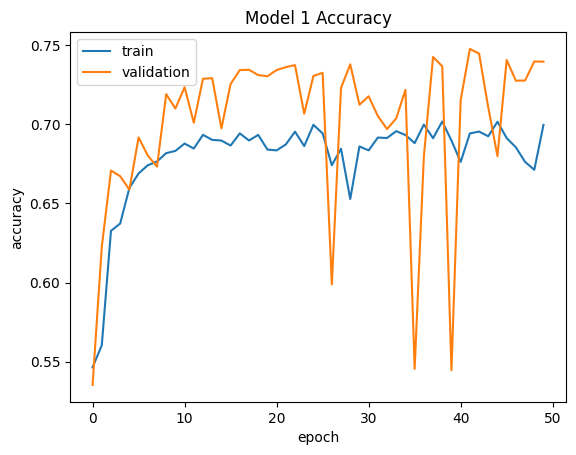

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# address the overfitting
# regularization layers


##**Model 2**

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(256, activation='relu', input_shape=(23,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint('./model_2.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1 , patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

In [ ]:
Model = model_2.fit(TRAINING_DATA, y_train, validation_split = 0.25, epochs = 50, verbose = 2)

Epoch 1/50
2212/2212 - 8s - loss: 0.9637 - accuracy: 0.5328 - val_loss: 0.6880 - val_accuracy: 0.5433 - 8s/epoch - 3ms/step
Epoch 2/50
2212/2212 - 7s - loss: 0.6892 - accuracy: 0.5462 - val_loss: 0.6797 - val_accuracy: 0.5455 - 7s/epoch - 3ms/step
Epoch 3/50
2212/2212 - 6s - loss: 0.6789 - accuracy: 0.5465 - val_loss: 0.6722 - val_accuracy: 0.5455 - 6s/epoch - 3ms/step
Epoch 4/50
2212/2212 - 8s - loss: 0.6721 - accuracy: 0.5460 - val_loss: 0.6680 - val_accuracy: 0.5455 - 8s/epoch - 3ms/step
Epoch 5/50
2212/2212 - 6s - loss: 0.6664 - accuracy: 0.5481 - val_loss: 0.6607 - val_accuracy: 0.5455 - 6s/epoch - 3ms/step
Epoch 6/50
2212/2212 - 8s - loss: 0.6648 - accuracy: 0.5472 - val_loss: 0.6598 - val_accuracy: 0.5520 - 8s/epoch - 3ms/step
Epoch 7/50
2212/2212 - 6s - loss: 0.6411 - accuracy: 0.6191 - val_loss: 0.6373 - val_accuracy: 0.6323 - 6s/epoch - 3ms/step
Epoch 8/50
2212/2212 - 6s - loss: 0.5821 - accuracy: 0.6961 - val_loss: 0.5492 - val_accuracy: 0.7308 - 6s/epoch - 3ms/step
Epoch 9/

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 2 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 2 accuracy is 86% on the training data and 85% on the validation data.


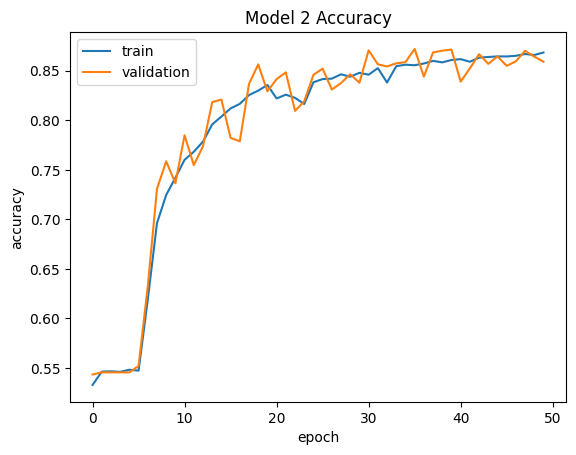

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# predictions on the training data
train_pred = model_2.predict(TRAINING_DATA)

for k in range(len(train_pred)):
  if train_pred[k] >= 0.5:
    train_pred[k] = 1
  else:
    train_pred[k] = 0

2950/2950 [==============================] - 18s 6ms/step


              precision    recall  f1-score   support

           0       0.94      0.74      0.83     42786
           1       0.82      0.96      0.89     51593

    accuracy                           0.86     94379
   macro avg       0.88      0.85      0.86     94379
weighted avg       0.88      0.86      0.86     94379



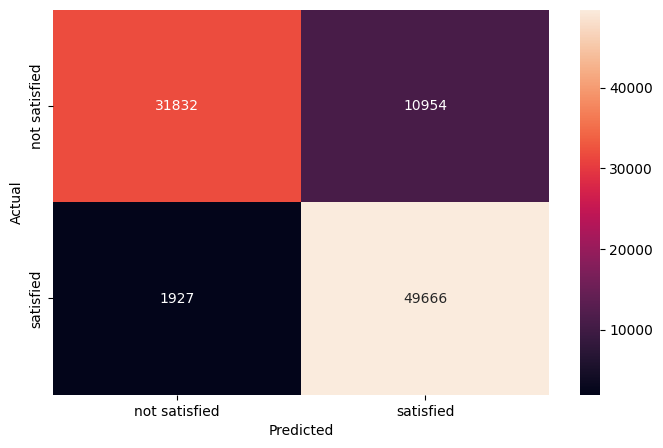

In [ ]:
# evaluate model performance on the training data
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['not satisfied', 'satisfied'], yticklabels=['not satisfied', 'satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
rmse

0.3694342060050297

In [ ]:
# predictions on the test data
test_pred = model_2.predict(TESTING_DATA)

test_pred

1113/1113 [==============================] - 2s 2ms/step


array([[0.9678958 ],
       [0.9047923 ],
       [0.97607017],
       ...,
       [0.5671246 ],
       [0.970366  ],
       [0.5474995 ]], dtype=float32)

I think I can do better...

##**Model 3**

* Improve accuracy - model architecture, epochs+, parameter tuning
* Reduce overfitting - regularization
Lets try BatchNormalization


In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_3 = Sequential()
model_3.add(Dense(512, activation='relu', input_shape=(23,)))
model_3.add(Dropout(0.1))
model_3.add(BatchNormalization())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(BatchNormalization())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

model_3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
mc = ModelCheckpoint('./model_3.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1 , patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]


In [ ]:
Model = model_3.fit(TRAINING_DATA, y_train, validation_split = 0.25, epochs = 200, batch_size = 100, verbose = 2)

Epoch 1/200
708/708 - 11s - loss: 0.6393 - accuracy: 0.6308 - val_loss: 0.6309 - val_accuracy: 0.6560 - 11s/epoch - 16ms/step
Epoch 2/200
708/708 - 9s - loss: 0.5729 - accuracy: 0.6983 - val_loss: 0.6329 - val_accuracy: 0.6505 - 9s/epoch - 12ms/step
Epoch 3/200
708/708 - 7s - loss: 0.5259 - accuracy: 0.7382 - val_loss: 0.8204 - val_accuracy: 0.5591 - 7s/epoch - 10ms/step
Epoch 4/200
708/708 - 9s - loss: 0.5057 - accuracy: 0.7520 - val_loss: 0.7845 - val_accuracy: 0.6164 - 9s/epoch - 12ms/step
Epoch 5/200
708/708 - 7s - loss: 0.4919 - accuracy: 0.7621 - val_loss: 0.4928 - val_accuracy: 0.7758 - 7s/epoch - 10ms/step
Epoch 6/200
708/708 - 9s - loss: 0.4765 - accuracy: 0.7731 - val_loss: 0.4838 - val_accuracy: 0.7969 - 9s/epoch - 12ms/step
Epoch 7/200
708/708 - 8s - loss: 0.4625 - accuracy: 0.7824 - val_loss: 0.4939 - val_accuracy: 0.7504 - 8s/epoch - 12ms/step
Epoch 8/200
708/708 - 7s - loss: 0.4512 - accuracy: 0.7894 - val_loss: 0.5265 - val_accuracy: 0.7389 - 7s/epoch - 10ms/step
Epoch 

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 3 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 3 accuracy is 91% on the training data and 92% on the validation data.


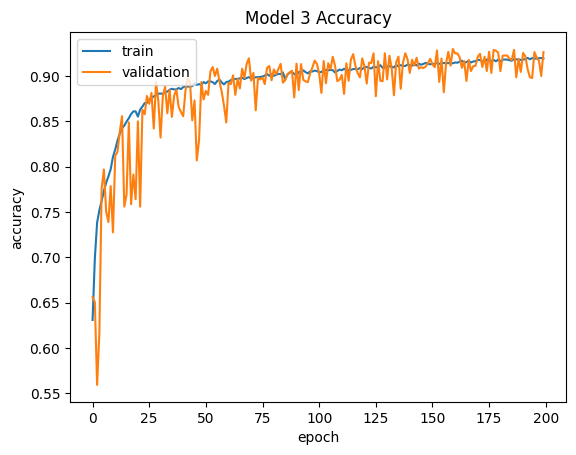

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# predictions on the training data
train_pred = model_3.predict(TRAINING_DATA)

for k in range(len(train_pred)):
  if train_pred[k] >= 0.5:
    train_pred[k] = 1
  else:
    train_pred[k] = 0

train_pred

2950/2950 [==============================] - 8s 3ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     42786
           1       0.93      0.94      0.94     51593

    accuracy                           0.93     94379
   macro avg       0.93      0.93      0.93     94379
weighted avg       0.93      0.93      0.93     94379



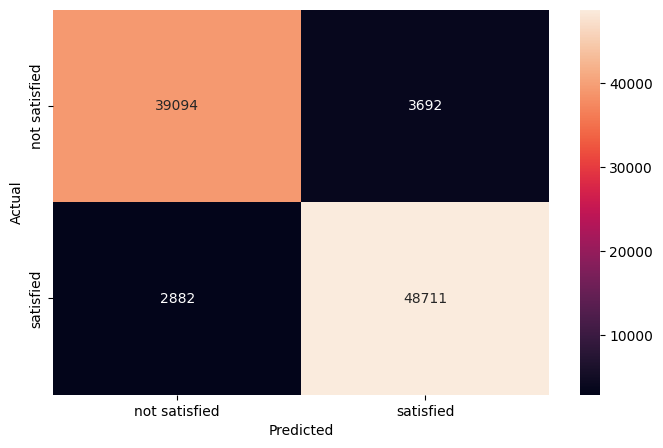

In [ ]:
# evaluate model performance on the training data
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['not satisfied', 'satisfied'], yticklabels=['not satisfied', 'satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
rmse

0.26392295441469865

In [ ]:
# predictions on the test data
test_pred = model_3.predict(TESTING_DATA)

for k in range(len(test_pred)):
  if test_pred[k] >= 0.5:
    test_pred[k] = 1
  else:
    test_pred[k] = 0

test_pred

1113/1113 [==============================] - 4s 4ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# generate the IDs for passengers in the testing data
ID_array = []
for k in range(len(test_pred)):
  id = 	99900001 + k
  ID_array.append(id)

# create submission dataframe of IDs and predictions for the testing data
data = []
for k in range(len(test_pred)):
  row = [ID_array[k], test_pred[k].astype(int)]
  data.append(row)


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd

In [ ]:
submission = pd.DataFrame(data, columns = ['ID', 'Overall_Experience'])
submission.to_csv('submission.csv')
submission

,ID,Overall_Experience
0,99900001,[1]
1,99900002,[1]
2,99900003,[1]
3,99900004,[0]
4,99900005,[1]
...,...,...
35597,99935598,[0]
35598,99935599,[1]
35599,99935600,[0]
35600,99935601,[1]


##**Model 4**
see if I can boost accuracy with a more complex model, then try a transfer learning model

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_4 = Sequential()
model_4.add(Dense(512, activation='relu', input_shape=(23,)))
model_4.add(Dropout(0.1))
model_4.add(BatchNormalization())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(BatchNormalization())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(BatchNormalization())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(BatchNormalization())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# set the optimizer parameters
opt = Adam(learning_rate = 0.001)

# compile the model
model_4.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               12288     
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
mc = ModelCheckpoint('./model_3.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1 , patience = 3, verbose = 1, min_delta = 0.0001)

callbacks_list = [mc, es, reduce_LR]

In [ ]:
Model = model_4.fit(TRAINING_DATA, y_train, validation_split = 0.25, epochs = 200, batch_size = 100, verbose = 2)

Epoch 1/200
708/708 - 16s - loss: 0.6515 - accuracy: 0.6147 - val_loss: 0.6515 - val_accuracy: 0.6355 - 16s/epoch - 22ms/step
Epoch 2/200
708/708 - 9s - loss: 0.6026 - accuracy: 0.6761 - val_loss: 0.6147 - val_accuracy: 0.6738 - 9s/epoch - 13ms/step
Epoch 3/200
708/708 - 11s - loss: 0.5665 - accuracy: 0.7060 - val_loss: 0.6592 - val_accuracy: 0.6396 - 11s/epoch - 15ms/step
Epoch 4/200
708/708 - 11s - loss: 0.5203 - accuracy: 0.7439 - val_loss: 1.0080 - val_accuracy: 0.5468 - 11s/epoch - 16ms/step
Epoch 5/200
708/708 - 11s - loss: 0.5150 - accuracy: 0.7442 - val_loss: 0.5238 - val_accuracy: 0.7414 - 11s/epoch - 15ms/step
Epoch 6/200
708/708 - 9s - loss: 0.5039 - accuracy: 0.7532 - val_loss: 0.6167 - val_accuracy: 0.6902 - 9s/epoch - 13ms/step
Epoch 7/200
708/708 - 11s - loss: 0.4942 - accuracy: 0.7615 - val_loss: 0.6540 - val_accuracy: 0.7033 - 11s/epoch - 15ms/step
Epoch 8/200
708/708 - 11s - loss: 0.4872 - accuracy: 0.7656 - val_loss: 0.6951 - val_accuracy: 0.6155 - 11s/epoch - 16ms/s

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 4 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 4 accuracy is 92% on the training data and 91% on the validation data.


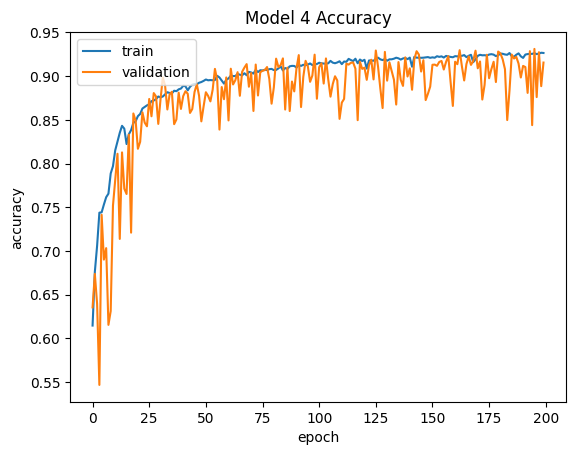

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# predictions on the training data
train_pred = model_4.predict(TRAINING_DATA)

for k in range(len(train_pred)):
  if train_pred[k] >= 0.5:
    train_pred[k] = 1
  else:
    train_pred[k] = 0

train_pred

2950/2950 [==============================] - 14s 5ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     42786
           1       0.90      0.96      0.93     51593

    accuracy                           0.92     94379
   macro avg       0.92      0.92      0.92     94379
weighted avg       0.92      0.92      0.92     94379



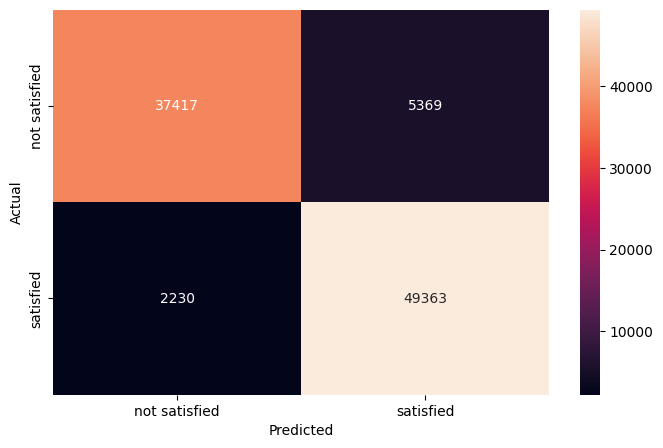

In [ ]:
# evaluate model performance on the training data
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['not satisfied', 'satisfied'], yticklabels=['not satisfied', 'satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
rmse

0.2837530488085082

In [ ]:
# predictions on the test data
test_pred = model_4.predict(TESTING_DATA)

for k in range(len(test_pred)):
  if test_pred[k] >= 0.5:
    test_pred[k] = 1
  else:
    test_pred[k] = 0

test_pred

1113/1113 [==============================] - 3s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# generate the IDs for passengers in the testing data
ID_array = []
for k in range(len(test_pred)):
  id = 	99900001 + k
  ID_array.append(id)

# create submission dataframe of IDs and predictions for the testing data
data = []
for k in range(len(test_pred)):
  row = [ID_array[k], test_pred[k].astype(int)]
  data.append(row)

In [ ]:
submission = pd.DataFrame(data, columns = ['ID', 'Overall_Experience'])
submission.to_csv('MathFac2DS_Submission2.csv')
submission

,ID,Overall_Experience
0,99900001,[1]
1,99900002,[1]
2,99900003,[1]
3,99900004,[0]
4,99900005,[1]
...,...,...
35597,99935598,[0]
35598,99935599,[1]
35599,99935600,[0]
35600,99935601,[1]


##**Model 5**

In [ ]:
# mount the drive
from google.colab import drive # mount to Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the data
X_train = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/X_TRAIN.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/X_TEST.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Hackathons/Shinkansen_Travel_Experience/y_TRAIN.csv')

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_5 = Sequential()
model_5.add(Dense(512, activation='tanh', input_shape=(23,)))
model_5.add(Dropout(0.1))
model_5.add(BatchNormalization())
model_5.add(Dense(256, activation='relu', input_shape=(23,)))
model_5.add(Dropout(0.1))
model_5.add(BatchNormalization())
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(BatchNormalization())
model_5.add(Dense(64, activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(BatchNormalization())
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
# set up monitoring
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('./model_5.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
# es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 1, restore_best_weights = True)
# reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5 , patience = 3, verbose = 1, min_delta = 0.0001)

# set the optimizer parameters
opt = Adam(learning_rate = 0.0001)

# compile the model
model_5.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [ ]:
# fit the model
Model = model_5.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 50, verbose = 2, callbacks = mc)

Epoch 1/200

Epoch 1: accuracy improved from -inf to 0.80809, saving model to ./model_5.keras
1511/1511 - 19s - loss: 0.4169 - accuracy: 0.8081 - val_loss: 0.2901 - val_accuracy: 0.8766 - 19s/epoch - 13ms/step
Epoch 2/200

Epoch 2: accuracy improved from 0.80809 to 0.85717, saving model to ./model_5.keras
1511/1511 - 16s - loss: 0.3288 - accuracy: 0.8572 - val_loss: 0.2416 - val_accuracy: 0.8992 - 16s/epoch - 11ms/step
Epoch 3/200

Epoch 3: accuracy improved from 0.85717 to 0.87538, saving model to ./model_5.keras
1511/1511 - 16s - loss: 0.2915 - accuracy: 0.8754 - val_loss: 0.2113 - val_accuracy: 0.9135 - 16s/epoch - 11ms/step
Epoch 4/200

Epoch 4: accuracy improved from 0.87538 to 0.88664, saving model to ./model_5.keras
1511/1511 - 16s - loss: 0.2684 - accuracy: 0.8866 - val_loss: 0.1939 - val_accuracy: 0.9192 - 16s/epoch - 10ms/step
Epoch 5/200

Epoch 5: accuracy improved from 0.88664 to 0.89416, saving model to ./model_5.keras
1511/1511 - 16s - loss: 0.2519 - accuracy: 0.8942 - va

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 5 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 5 accuracy is 94% on the training data and 94% on the validation data.


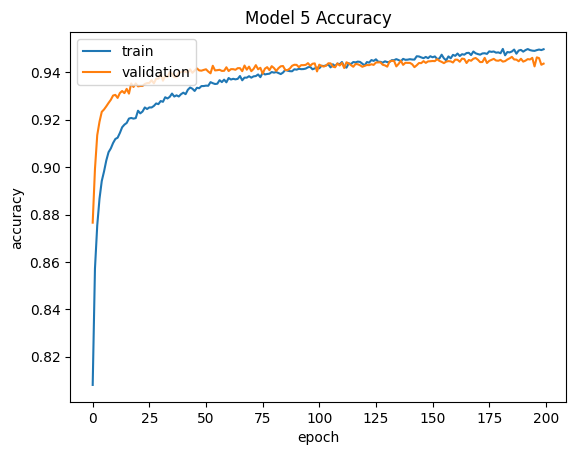

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 5 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# predictions on the training data
train_pred = model_5.predict(X_train)
for k in range(len(train_pred)):
  if train_pred[k] >= 0.5:
    train_pred[k] = 1
  else:
    train_pred[k] = 0
train_pred

2950/2950 [==============================] - 10s 3ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     42786
           1       0.96      0.96      0.96     51593

    accuracy                           0.96     94379
   macro avg       0.96      0.96      0.96     94379
weighted avg       0.96      0.96      0.96     94379



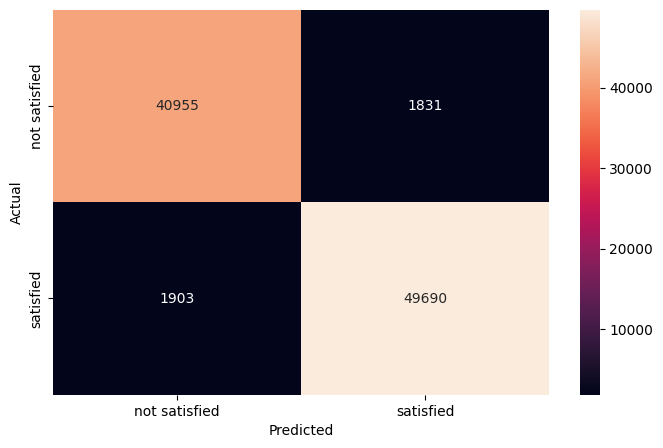

In [ ]:
# evaluate model performance on the training data
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels = ['not satisfied', 'satisfied'], yticklabels = ['not satisfied', 'satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
rmse

0.19890672697012896

In [ ]:
# predictions on the test data
test_pred = model_5.predict(X_test)
for k in range(len(test_pred)):
  if test_pred[k] >= 0.5:
    test_pred[k] = 1
  else:
    test_pred[k] = 0
test_pred

1113/1113 [==============================] - 5s 4ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
# generate the IDs for passengers in the testing data
ID_array = []
for k in range(len(test_pred)):
  id =  99900001 + k
  ID_array.append(id)

# create submission dataframe of IDs and predictions for the testing data
data = []
for k in range(len(test_pred)):
  row = [ID_array[k], test_pred[k].astype(int)]
  data.append(row)

In [ ]:
submission = pd.DataFrame(data, columns = ['ID', 'Overall_Experience'])
submission.to_csv('MathFac2DS_Submission4.csv')
submission

,ID,Overall_Experience
0,99900001,[1]
1,99900002,[1]
2,99900003,[1]
3,99900004,[0]
4,99900005,[1]
...,...,...
35597,99935598,[0]
35598,99935599,[1]
35599,99935600,[1]
35600,99935601,[1]


##**Model 6**

In [ ]:
# import the libraries
import numpy as np # data processing
import pandas as pd # tabular data analysis
import matplotlib.pyplot as plt # stat plots
import seaborn as sns # plotting

from sklearn.model_selection import train_test_split # partition the data into train set and test set
from sklearn.preprocessing import MinMaxScaler # normalize vectors in preprocessing

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# Clear the backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_6 = Sequential()
model_6.add(Dense(256, activation='relu', input_shape=(23,)))
model_6.add(Dropout(0.1))
model_6.add(BatchNormalization())
model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(0.1))
model_6.add(BatchNormalization())
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(BatchNormalization())
model_6.add(Dense(128, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
# set up monitoring
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('./model_6.keras', monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
# set the optimizer parameters
opt = Adam(learning_rate = 0.0001)
# compile the model
model_6.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

In [ ]:
# fit the model
Model = model_6.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 2, callbacks = mc)

Epoch 1/200

Epoch 1: accuracy improved from -inf to 0.73038, saving model to ./model_6.keras
378/378 - 6s - loss: 0.5300 - accuracy: 0.7304 - val_loss: 0.4841 - val_accuracy: 0.7590 - 6s/epoch - 16ms/step
Epoch 2/200

Epoch 2: accuracy improved from 0.73038 to 0.83034, saving model to ./model_6.keras
378/378 - 3s - loss: 0.3823 - accuracy: 0.8303 - val_loss: 0.3287 - val_accuracy: 0.8595 - 3s/epoch - 9ms/step
Epoch 3/200

Epoch 3: accuracy improved from 0.83034 to 0.85128, saving model to ./model_6.keras
378/378 - 3s - loss: 0.3415 - accuracy: 0.8513 - val_loss: 0.2926 - val_accuracy: 0.8757 - 3s/epoch - 7ms/step
Epoch 4/200

Epoch 4: accuracy improved from 0.85128 to 0.86313, saving model to ./model_6.keras
378/378 - 3s - loss: 0.3146 - accuracy: 0.8631 - val_loss: 0.2737 - val_accuracy: 0.8816 - 3s/epoch - 7ms/step
Epoch 5/200

Epoch 5: accuracy improved from 0.86313 to 0.87330, saving model to ./model_6.keras
378/378 - 3s - loss: 0.2939 - accuracy: 0.8733 - val_loss: 0.2545 - val_a

In [ ]:
# print the training and validation accuracies stored for the trained model
print(f"Model 6 accuracy is {int(Model.history['accuracy'][-1]*100)}% on the training data and {int(Model.history['val_accuracy'][-1]*100)}% on the validation data.")

Model 6 accuracy is 96% on the training data and 94% on the validation data.


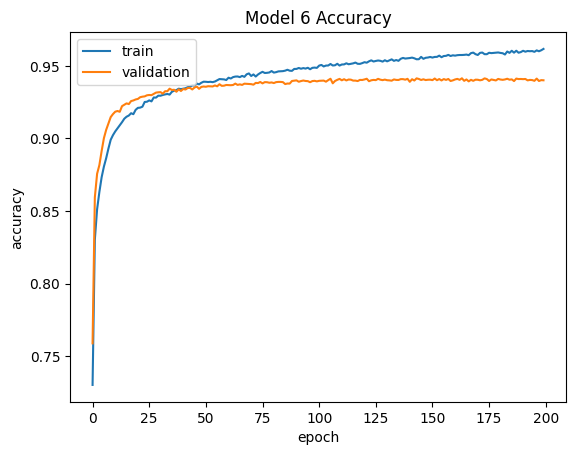

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model 6 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# predictions on the training data
train_pred = model_6.predict(X_train)
for k in range(len(train_pred)):
  if train_pred[k] >= 0.5:
    train_pred[k] = 1
  else:
    train_pred[k] = 0
train_pred

2950/2950 [==============================] - 6s 2ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42786
           1       0.97      0.97      0.97     51593

    accuracy                           0.97     94379
   macro avg       0.97      0.97      0.97     94379
weighted avg       0.97      0.97      0.97     94379



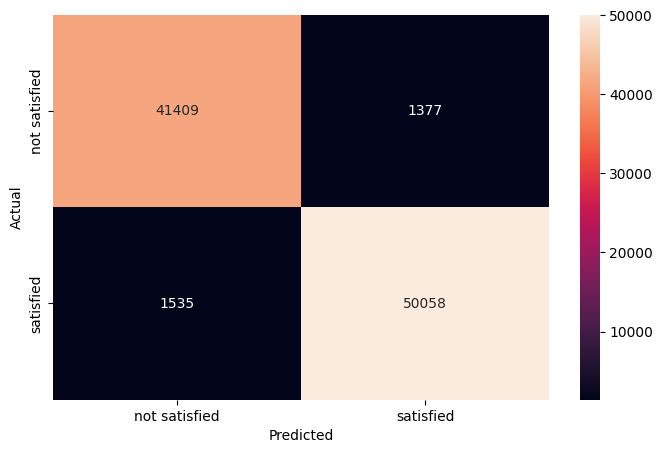

In [ ]:
# evaluate model performance on the training data
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels = ['not satisfied', 'satisfied'], yticklabels = ['not satisfied', 'satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
rmse


0.17565398203924965

In [ ]:
# predictions on the test data
test_pred = model_6.predict(X_test)
for k in range(len(test_pred)):
  if test_pred[k] >= 0.5:
    test_pred[k] = 1
  else:
    test_pred[k] = 0
test_pred


1113/1113 [==============================] - 4s 3ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
# generate the IDs for passengers in the testing data
ID_array = []
for k in range(len(test_pred)):
  id =  99900001 + k
  ID_array.append(id)


# create submission dataframe of IDs and predictions for the testing data
data = []
for k in range(len(test_pred)):
  row = [ID_array[k], test_pred[k].astype(int)]
  data.append(row)


In [ ]:
submission = pd.DataFrame(data, columns = ['ID', 'Overall_Experience'])
submission.to_csv('MathFac2DS_Submission5.csv')
submission

,ID,Overall_Experience
0,99900001,[1]
1,99900002,[1]
2,99900003,[1]
3,99900004,[0]
4,99900005,[1]
...,...,...
35597,99935598,[0]
35598,99935599,[1]
35599,99935600,[1]
35600,99935601,[1]
